In [1]:
# Install wget (if not already installed)
!pip install wget

import wget
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB

raw_github_url = 'https://raw.githubusercontent.com/bellamccarty/CSC-466-Project/main/Bayesian_Classifier.py'

# Define the local file name you want to save it as in Colab
local_file_name = 'Bayesian_Classifier.py'

# Download the Python file from GitHub
wget.download(raw_github_url, local_file_name)

# Import the entire Python file (module)
import Bayesian_Classifier

In [2]:
data_dir = "https://raw.githubusercontent.com/bellamccarty/data/main/"
df_results = pd.read_csv(data_dir + "df_results.csv")

## Specific Aims

Predicts wins/losses based on country, gdp, and home-field advantage.

Predict where a match is held based on various country information: life expectancy, population, and gdp.

Predict gdp based on each countries’ win/loss ratio at home/away and point differential

In [3]:
df_results = df_results.drop('Unnamed: 0', axis = 1)

In [4]:
# Calculate the point differential
df_results['point_diff'] = df_results['home_score'] - df_results['away_score']
# Create a new column "home_advtg" and set the default value to False
df_results["home_advtg"] = False

# Set the value of "home_advtg" to True for rows where 'home_team' is equal to 'country'
df_results.loc[df_results["home_team"] == df_results["country"], "home_advtg"] = True

# Function to determine the winning team based on the point differential
def determine_winning_team(point_diff):
    if point_diff > 0:
        return 'home'
    elif point_diff < 0:
        return 'away'
    else:
        return 'draw'  # You can customize this for cases where the scores are equal

# Apply the function to create the "winning_team" column
df_results['winning_team'] = df_results['point_diff'].apply(determine_winning_team)

# Print the updated DataFrame
df_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,continent,lifeExp,pop,gdpPercap,point_diff,home_advtg,winning_team
0,1952-02-24,Belgium,Italy,2,0,Friendly,Brussels,Belgium,False,1952,Europe,68.000,8730405,8343.105127,2,True,home
1,1952-04-06,Belgium,Netherlands,4,2,Friendly,Antwerp,Belgium,False,1952,Europe,68.000,8730405,8343.105127,2,True,home
2,1952-05-22,Belgium,France,1,2,Friendly,Brussels,Belgium,False,1952,Europe,68.000,8730405,8343.105127,-1,True,away
3,1952-10-19,Belgium,Netherlands,2,1,Friendly,Antwerp,Belgium,False,1952,Europe,68.000,8730405,8343.105127,1,True,home
4,1952-03-16,Chile,Panama,6,1,Pan American Championship,Santiago,Chile,False,1952,Americas,54.745,6377619,3939.978789,5,True,home


In [5]:
# Define the bin edges for the categories
bin_edges = [0, 5000, 10000, 20000, 30000, 50000, float('inf')]

# Define the labels for the categories
bin_labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High', 'Extremely High']

# Use pd.cut() to create the new 'GDP Category' column based on 'gdpPercap'
df_results['GDP_Category'] = pd.cut(df_results['gdpPercap'], bins=bin_edges, labels=bin_labels)

df_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,continent,lifeExp,pop,gdpPercap,point_diff,home_advtg,winning_team,GDP_Category
0,1952-02-24,Belgium,Italy,2,0,Friendly,Brussels,Belgium,False,1952,Europe,68.000,8730405,8343.105127,2,True,home,Low
1,1952-04-06,Belgium,Netherlands,4,2,Friendly,Antwerp,Belgium,False,1952,Europe,68.000,8730405,8343.105127,2,True,home,Low
2,1952-05-22,Belgium,France,1,2,Friendly,Brussels,Belgium,False,1952,Europe,68.000,8730405,8343.105127,-1,True,away,Low
3,1952-10-19,Belgium,Netherlands,2,1,Friendly,Antwerp,Belgium,False,1952,Europe,68.000,8730405,8343.105127,1,True,home,Low
4,1952-03-16,Chile,Panama,6,1,Pan American Championship,Santiago,Chile,False,1952,Americas,54.745,6377619,3939.978789,5,True,home,Very Low


In [6]:
features = ['country', 'winning_team', 'year', 'tournament']
df_results_01 = df_results.loc[:,features]

# Drop rows with NaN values (if any)
df_results_01 = df_results_01.dropna()

# Display the modified DataFrame
df_results_01.head()

,country,winning_team,year,tournament
0,Belgium,home,1952,Friendly
1,Belgium,home,1952,Friendly
2,Belgium,away,1952,Friendly
3,Belgium,home,1952,Friendly
4,Chile,home,1952,Pan American Championship


In [7]:
X = df_results_01.drop("winning_team",axis=1)
y = df_results_01["winning_team"]
probs = Bayesian_Classifier.class_conditional_lab2(X,y)
probs

{'country=Afghanistan|winning_team=away': 0.0009416195856873823,
 'country=Afghanistan|winning_team=draw': 1e-06,
 'country=Afghanistan|winning_team=home': 1e-06,
 'country=Albania|winning_team=away': 0.005649717514124294,
 'country=Albania|winning_team=draw': 0.005836575875486381,
 'country=Albania|winning_team=home': 0.002891566265060241,
 'country=Algeria|winning_team=away': 0.002824858757062147,
 'country=Algeria|winning_team=draw': 0.005836575875486381,
 'country=Algeria|winning_team=home': 0.008674698795180723,
 'country=Angola|winning_team=away': 0.0009416195856873823,
 'country=Angola|winning_team=draw': 0.005836575875486381,
 'country=Angola|winning_team=home': 0.004337349397590362,
 'country=Argentina|winning_team=away': 0.006591337099811676,
 'country=Argentina|winning_team=draw': 0.013618677042801557,
 'country=Argentina|winning_team=home': 0.012048192771084338,
 'country=Australia|winning_team=away': 0.005649717514124294,
 'country=Australia|winning_team=draw': 0.006809338

In [8]:
probs = Bayesian_Classifier.class_conditional_lab2(X,y)
priors = Bayesian_Classifier.compute_priors_lab2(y)
x = df_results_01.drop("winning_team",axis=1).loc[167]
x

country        Germany
year              1957
tournament    Friendly
Name: 167, dtype: object

In [9]:
post_probs = Bayesian_Classifier.posteriors(probs,priors,x)
post_probs

{'winning_team=away|country=Germany,year=1957,tournament=Friendly': 0.05239200039306379,
 'winning_team=draw|country=Germany,year=1957,tournament=Friendly': 0.07189371305292212,
 'winning_team=home|country=Germany,year=1957,tournament=Friendly': 0.25071641131923655}

In [10]:
np.random.seed(0)
Xtrain,ytrain,Xtest,ytest=Bayesian_Classifier.train_test_split(X,y,test_frac = 0.1)
print('Xtrain')
display(Xtrain.head())
print('ytrain')
display(ytrain.head())
print('Xtest')
display(Xtest.head())
print('ytest')
display(ytest.head())

Xtrain


,country,year,tournament
381,Spain,1962,UEFA Euro qualification
3456,Indonesia,2002,AFF Championship
2635,Malaysia,1997,FIFA World Cup qualification
1368,Benin,1982,West African Cup
3969,Mozambique,2007,COSAFA Cup


ytrain


381     home
3456    away
2635    away
1368    home
3969    home
Name: winning_team, dtype: object

Xtest


,country,year,tournament
3635,Malaysia,2007,Merdeka Tournament
1314,Jamaica,1977,Friendly
3445,Haiti,2002,Gold Cup qualification
786,Brazil,1972,Brazil Independence Cup
873,Kenya,1972,FIFA World Cup qualification


ytest


3635    home
1314    away
3445    home
786     away
873     home
Name: winning_team, dtype: object

In [11]:
np.random.seed(2)
Xtrain,ytrain,Xtest,ytest=Bayesian_Classifier.train_test_split(X,y, test_frac = 0.1)
accuracy = Bayesian_Classifier.exercise_6_lab2(Xtrain,ytrain,Xtest,ytest)
accuracy

winning_team=home|country=Algeria,year=1977,tournament=African Cup of Nations qualification
winning_team=home|country=Algeria,year=1992,tournament=FIFA World Cup qualification
winning_team=home|country=Guinea,year=1972,tournament=Friendly
winning_team=draw|country=Japan,year=1982,tournament=Kirin Cup
winning_team=home|country=Netherlands,year=1967,tournament=Friendly
winning_team=home|country=Austria,year=1967,tournament=Friendly
winning_team=away|country=Vietnam,year=2007,tournament=AFC Asian Cup
winning_team=home|country=Malaysia,year=1972,tournament=Merdeka Tournament
winning_team=away|country=Pakistan,year=1982,tournament=Friendly
winning_team=home|country=Egypt,year=1977,tournament=FIFA World Cup qualification
winning_team=draw|country=Benin,year=1982,tournament=West African Cup
winning_team=away|country=Slovenia,year=2002,tournament=UEFA Euro qualification
winning_team=home|country=Italy,year=1967,tournament=Friendly
winning_team=home|country=Norway,year=2002,tournament=UEFA Euro

0.5024038461538461

In [12]:
np.random.seed(0)
importances_test = Bayesian_Classifier.exercise_7_lab2(Xtrain,ytrain,Xtest,ytest)
importances_test

Streaming output truncated to the last 5000 lines.
winning_team=home|country=Hungary,year=1987,tournament=FIFA World Cup qualification
winning_team=home|country=Malaysia,year=1977,tournament=FIFA World Cup qualification
winning_team=home|country=Guatemala,year=2002,tournament=CONCACAF Championship qualification
winning_team=away|country=Tanzania,year=2002,tournament=CECAFA Cup
winning_team=home|country=Senegal,year=2007,tournament=African Cup of Nations qualification
winning_team=home|country=Portugal,year=2007,tournament=FIFA World Cup qualification
winning_team=home|country=Venezuela,year=1972,tournament=Copa América
winning_team=home|country=Jamaica,year=1987,tournament=CFU Caribbean Cup qualification
winning_team=home|country=Algeria,year=1967,tournament=African Cup of Nations qualification
winning_team=home|country=Algeria,year=1972,tournament=FIFA World Cup qualification
winning_team=home|country=Guinea,year=1992,tournament=Friendly
winning_team=draw|country=Japan,year=1982,tourn

{'country': 0.041826923076923074,
 'year': -0.0007211538461538436,
 'tournament': -0.002163461538461542}

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, classification_report
# Extract the columns for training and target variables
# Replace 'target_column_name' with the name of the column you want to predict
X = df_results_01.drop("winning_team",axis=1)
y = df_results_01["winning_team"]

# Initialize LabelEncoder for encoding categorical variables
label_encoder = LabelEncoder()

# Encode categorical variables in the training data
for col in ['country', 'tournament']:
    X[col] = label_encoder.fit_transform(X[col])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize the CategoricalNB model
categorical_nb_model = CategoricalNB()

# Train the model on the training data
categorical_nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = categorical_nb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.49640287769784175
Classification Report:
               precision    recall  f1-score   support

        away       0.32      0.06      0.11       109
        draw       0.40      0.04      0.08        95
        home       0.51      0.92      0.66       213

    accuracy                           0.50       417
   macro avg       0.41      0.34      0.28       417
weighted avg       0.43      0.50      0.38       417



In [14]:
np.random.seed(0)
importances_test = Bayesian_Classifier.exercise_7_lab2(Xtrain,ytrain,Xtest,ytest)
importances_test

Streaming output truncated to the last 5000 lines.
winning_team=home|country=Hungary,year=1987,tournament=FIFA World Cup qualification
winning_team=home|country=Malaysia,year=1977,tournament=FIFA World Cup qualification
winning_team=home|country=Guatemala,year=2002,tournament=CONCACAF Championship qualification
winning_team=away|country=Tanzania,year=2002,tournament=CECAFA Cup
winning_team=home|country=Senegal,year=2007,tournament=African Cup of Nations qualification
winning_team=home|country=Portugal,year=2007,tournament=FIFA World Cup qualification
winning_team=home|country=Venezuela,year=1972,tournament=Copa América
winning_team=home|country=Jamaica,year=1987,tournament=CFU Caribbean Cup qualification
winning_team=home|country=Algeria,year=1967,tournament=African Cup of Nations qualification
winning_team=home|country=Algeria,year=1972,tournament=FIFA World Cup qualification
winning_team=home|country=Guinea,year=1992,tournament=Friendly
winning_team=draw|country=Japan,year=1982,tourn

{'country': 0.041826923076923074,
 'year': -0.0007211538461538436,
 'tournament': -0.002163461538461542}

In [15]:
features = ['neutral', 'lifeExp', 'pop', 'gdpPercap']
df_results_02 = df_results.loc[:,features]
df_results_02['neutral'] = df_results_02['neutral'].astype(str)

# Drop rows with NaN values (if any)
df_results_02 = df_results_02.dropna()

# Display the modified DataFrame
df_results_02.head()

,neutral,lifeExp,pop,gdpPercap
0,False,68.000,8730405,8343.105127
1,False,68.000,8730405,8343.105127
2,False,68.000,8730405,8343.105127
3,False,68.000,8730405,8343.105127
4,False,54.745,6377619,3939.978789


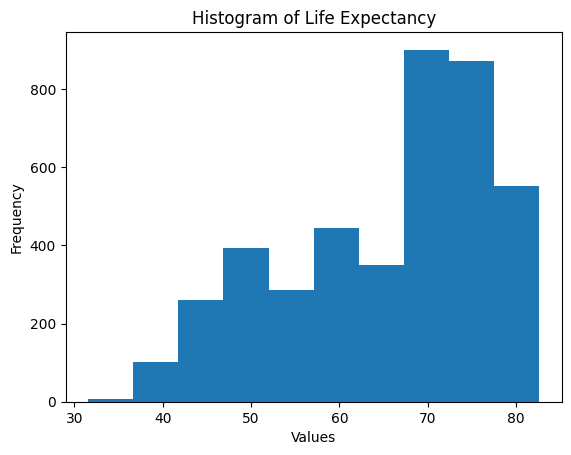

In [16]:
import matplotlib.pyplot as plt

# Plot a histogram for the column "pop"
plt.hist(df_results_02['lifeExp'], bins=10)  # Adjust the number of bins as per your data
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Life Expectancy')
plt.show()

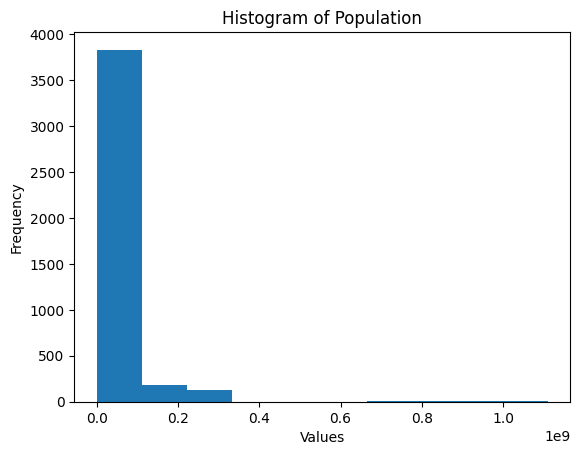

In [17]:
# Plot a histogram for the column "pop"
plt.hist(df_results_02['pop'], bins=10)  # Adjust the number of bins as per your data
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Population')
plt.show()

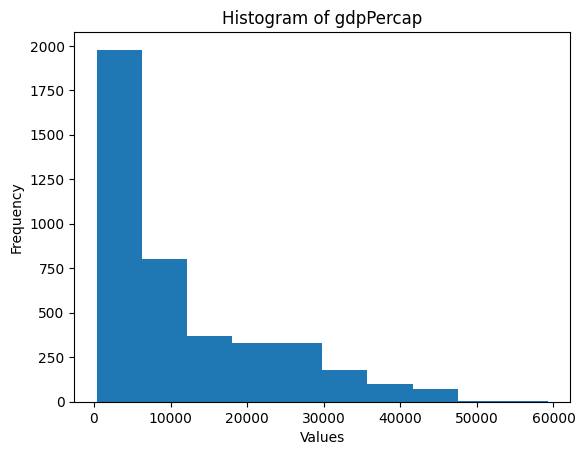

In [18]:
# Plot a histogram for the column "gdpPercap"
plt.hist(df_results_02['gdpPercap'], bins=10)  # Adjust the number of bins as per your data
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of gdpPercap')
plt.show()

In [19]:
# Perform the logarithmic transformation on the 'pop' and 'gdpPercap' columns
from sklearn.preprocessing import MinMaxScaler

# Assuming you have already performed the log transformation on 'pop' and 'gdpPercap'
# df_results_02['pop'] = np.log(df_results_02['pop'])
# df_results_02['gdpPercap'] = np.log(df_results_02['gdpPercap'])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Perform normalization on 'pop' and 'gdpPercap'
df_results_02[['pop', 'gdpPercap']] = scaler.fit_transform(df_results_02[['pop', 'gdpPercap']])

# Display the modified DataFrame
print(df_results_02.head())

  neutral  lifeExp       pop  gdpPercap
0   False   68.000  0.007715   0.135085
1   False   68.000  0.007715   0.135085
2   False   68.000  0.007715   0.135085
3   False   68.000  0.007715   0.135085
4   False   54.745  0.005596   0.060298


In [20]:
X = df_results_02.drop("neutral",axis=1)
y = df_results_02["neutral"]
probs = Bayesian_Classifier.class_conditional_gaussian(X,y)
probs

{'neutral=False': {'lifeExp': {'mean': 65.45805806451612,
   'std': 11.523558664187492},
  'pop': {'mean': 0.028690737226401655, 'std': 0.07292840332635038},
  'gdpPercap': {'mean': 0.18041836899792874, 'std': 0.18369137471192393}},
 'neutral=True': {'lifeExp': {'mean': 65.47189765258216,
   'std': 11.25461215722454},
  'pop': {'mean': 0.0553415413968036, 'std': 0.11816822761879306},
  'gdpPercap': {'mean': 0.1967079091802333, 'std': 0.21394505000692252}}}

In [21]:
probs = Bayesian_Classifier.class_conditional_gaussian(X,y)
priors = Bayesian_Classifier.compute_priors(y)
x = df_results_02.drop("neutral",axis=1).loc[3150]
x

lifeExp      78.256000
pop           0.009402
gdpPercap     0.375782
Name: 3150, dtype: float64

In [22]:
post_probs = Bayesian_Classifier.posteriors_gaussian(probs,priors,x)
post_probs

{'neutral=False': 0.060881758271978476, 'neutral=True': 0.03823318623936029}

In [23]:
max_value = max(post_probs, key=post_probs.get).split("=")[1]
print(max_value)
print(df_results_02.loc[3150])

False
neutral         False
lifeExp        78.256
pop          0.009402
gdpPercap    0.375782
Name: 3150, dtype: object


In [24]:
np.random.seed(0)
Xtrain,ytrain,Xtest,ytest=Bayesian_Classifier.train_test_split(X,y, test_frac =0.2)
accuracy = Bayesian_Classifier.exercise_6_gaussian(Xtrain,ytrain,Xtest,ytest)
accuracy

0.7130852340936374

In [25]:
np.random.seed(0)
importances_test = Bayesian_Classifier.exercise_7_gaussian(Xtrain,ytrain,Xtest,ytest)
importances_test

{'lifeExp': 0.003961584633853521,
 'pop': 0.029411764705882325,
 'gdpPercap': 0.006002400960384136}

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the GaussianNB model
model = GaussianNB()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred).sum()))

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Number of mislabeled points out of a total 833 points : 213
0.7442977190876351
Classification Report:
               precision    recall  f1-score   support

       False       0.75      0.98      0.85       619
        True       0.52      0.07      0.13       214

    accuracy                           0.74       833
   macro avg       0.63      0.53      0.49       833
weighted avg       0.69      0.74      0.67       833



In [27]:
np.random.seed(0)
importances_test = Bayesian_Classifier.exercise_7_gaussian(Xtrain,ytrain,Xtest,ytest)
importances_test

{'lifeExp': 0.003961584633853521,
 'pop': 0.029411764705882325,
 'gdpPercap': 0.006002400960384136}

In [28]:
df_results_03 = df_results.loc[df_results["year"] == 2007]

import pandas as pd

# Assuming you have your data in a DataFrame named 'df_results_03'

# Determine the match result (win/loss/tie) for each match based on point_diff
df_results_03['result'] = df_results_03['point_diff'].apply(lambda x: 'win' if x > 0 else ('loss' if x < 0 else 'tie'))

# Count the total matches played as the home team for each country
home_match_counts = df_results_03['home_team'].value_counts()
home_match_counts = home_match_counts.rename('home_matches_played')

# Count the total matches played as the away team for each country
away_match_counts = df_results_03['away_team'].value_counts()
away_match_counts = away_match_counts.rename('away_matches_played')

# Count the number of wins as the home team for each country
home_win_counts = df_results_03[df_results_03['result'] == 'win']['home_team'].value_counts()
home_win_counts = home_win_counts.rename('home_wins')

# Count the number of wins as the away team for each country
away_win_counts = df_results_03[df_results_03['result'] == 'loss']['away_team'].value_counts()
away_win_counts = away_win_counts.rename('away_wins')

# Calculate the number of losses as the home team for each country
home_loss_counts = home_match_counts - home_win_counts
home_loss_counts = home_loss_counts.rename('home_losses')

# Calculate the number of losses as the away team for each country
away_loss_counts = away_match_counts - away_win_counts
away_loss_counts = away_loss_counts.rename('away_losses')

# Calculate the number of ties as the home team for each country
home_tie_counts = df_results_03[df_results_03['result'] == 'tie']['home_team'].value_counts()
home_tie_counts = home_tie_counts.rename('home_ties')

# Calculate the number of ties as the away team for each country
away_tie_counts = df_results_03[df_results_03['result'] == 'tie']['away_team'].value_counts()
away_tie_counts = away_tie_counts.rename('away_ties')

# Create a DataFrame to store the win/loss/tie counts for each country
win_loss_tie_counts = pd.concat([home_win_counts, home_loss_counts, home_tie_counts, away_win_counts, away_loss_counts, away_tie_counts], axis=1).fillna(0)

# Calculate the win/loss ratio for each country as the home team
win_loss_tie_counts['home_win_loss_ratio'] = win_loss_tie_counts['home_wins'] / home_match_counts

# Calculate the win/loss ratio for each country as the away team
win_loss_tie_counts['away_win_loss_ratio'] = win_loss_tie_counts['away_wins'] / away_match_counts

# Drop countries where home losses are equal to 0 and home win/loss ratio is equal to 1
win_loss_tie_counts = win_loss_tie_counts.drop(
    win_loss_tie_counts[(win_loss_tie_counts['home_losses'] == 0) & (win_loss_tie_counts['home_win_loss_ratio'] == 1)].index
)

# Drop countries where away losses are equal to 0 and away win/loss ratio is equal to 1
win_loss_tie_counts = win_loss_tie_counts.drop(
    win_loss_tie_counts[(win_loss_tie_counts['away_losses'] == 0) & (win_loss_tie_counts['away_win_loss_ratio'] == 1)].index
)

# Display the updated DataFrame
print(win_loss_tie_counts)

# Merge the win/loss ratio back into the original DataFrame 'df_results_03'
df_results_03 = df_results_03.merge(win_loss_tie_counts[['home_win_loss_ratio', 'away_win_loss_ratio']],
                                    left_on='home_team', right_index=True, how='left')
df_results_03 = df_results_03.merge(win_loss_tie_counts[['home_win_loss_ratio', 'away_win_loss_ratio']],
                                    left_on='away_team', right_index=True, how='left',
                                    suffixes=('_home', '_away'))

# Drop rows with NaN values (if any)
df_results_03 = df_results_03.dropna()

# Display the modified DataFrame
df_results_03.head()

               home_wins  home_losses  home_ties  away_wins  away_losses  \
Mexico              12.0          7.0        2.0        1.0          3.0   
Thailand             9.0          8.0        6.0        1.0          1.0   
United States        9.0          3.0        1.0        2.0          3.0   
Colombia             8.0          2.0        1.0        2.0          5.0   
Brazil               7.0          1.0        0.0        4.0          4.0   
...                  ...          ...        ...        ...          ...   
Tajikistan           0.0          0.0        0.0        0.0          0.0   
Tibet                0.0          0.0        0.0        0.0          0.0   
Ukraine              0.0          0.0        0.0        0.0          0.0   
Vanuatu              0.0          0.0        0.0        0.0          0.0   
Yemen                0.0          0.0        0.0        0.0          0.0   

               away_ties  home_win_loss_ratio  away_win_loss_ratio  
Mexico            

<ipython-input-28-3d40fd3bf0a5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results_03['result'] = df_results_03['point_diff'].apply(lambda x: 'win' if x > 0 else ('loss' if x < 0 else 'tie'))


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,...,gdpPercap,point_diff,home_advtg,winning_team,GDP_Category,result,home_win_loss_ratio_home,away_win_loss_ratio_home,home_win_loss_ratio_away,away_win_loss_ratio_away
3462,2007-01-07,Haiti,Bermuda,2,0,CFU Caribbean Cup qualification,Couva,Trinidad and Tobago,True,2007,...,18008.50924,2,False,home,Moderate,win,0.571429,0.600000,0.000000,0.333333
3463,2007-01-09,Bermuda,Haiti,0,3,CFU Caribbean Cup qualification,Couva,Trinidad and Tobago,True,2007,...,18008.50924,-3,False,away,Moderate,loss,0.000000,0.333333,0.571429,0.600000
3465,2007-01-12,Trinidad and Tobago,Barbados,1,1,CFU Caribbean Cup,Port of Spain,Trinidad and Tobago,False,2007,...,18008.50924,0,True,draw,Moderate,tie,0.571429,0.000000,0.000000,0.000000
3466,2007-01-14,Cuba,Guadeloupe,1,2,CFU Caribbean Cup,San Fernando,Trinidad and Tobago,True,2007,...,18008.50924,-1,False,away,Moderate,loss,0.250000,0.000000,0.000000,0.571429
3467,2007-01-15,Haiti,Barbados,2,0,CFU Caribbean Cup,Port of Spain,Trinidad and Tobago,True,2007,...,18008.50924,2,False,home,Moderate,win,0.571429,0.600000,0.000000,0.000000


In [29]:
df_results_03.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'continent',
       'lifeExp', 'pop', 'gdpPercap', 'point_diff', 'home_advtg',
       'winning_team', 'GDP_Category', 'result', 'home_win_loss_ratio_home',
       'away_win_loss_ratio_home', 'home_win_loss_ratio_away',
       'away_win_loss_ratio_away'],
      dtype='object')

In [30]:
features = ['country', 'GDP_Category', 'home_win_loss_ratio_home', 'home_win_loss_ratio_away']
df_results_03 = df_results_03.loc[:,features]

# Display the modified DataFrame
df_results_03 = df_results_03.reset_index()
df_results_03 = df_results_03.drop("index", axis = 1)
df_results_03.head()

,country,GDP_Category,home_win_loss_ratio_home,home_win_loss_ratio_away
0,Trinidad and Tobago,Moderate,0.571429,0.000000
1,Trinidad and Tobago,Moderate,0.000000,0.571429
2,Trinidad and Tobago,Moderate,0.571429,0.000000
3,Trinidad and Tobago,Moderate,0.250000,0.000000
4,Trinidad and Tobago,Moderate,0.571429,0.000000


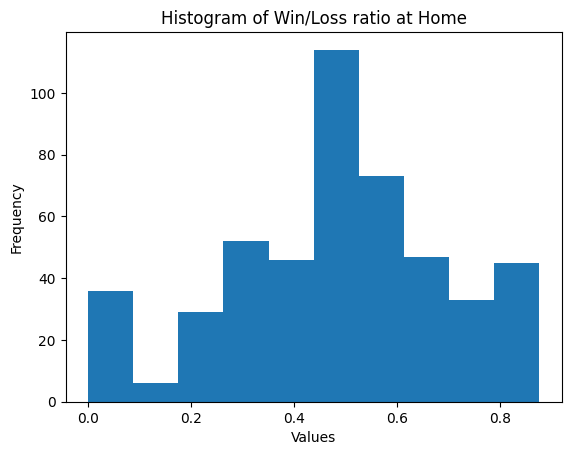

In [37]:
# Plot a histogram for the column "pop"
plt.hist(df_results_03['home_win_loss_ratio_home'], bins=10)  # Adjust the number of bins as per your data
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Win/Loss ratio at Home')
plt.show()

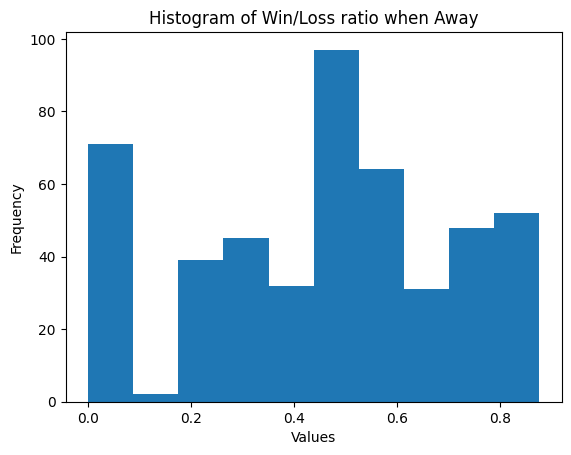

In [38]:
# Plot a histogram for the column "pop"
plt.hist(df_results_03['home_win_loss_ratio_away'], bins=10)  # Adjust the number of bins as per your data
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Win/Loss ratio when Away')
plt.show()

In [31]:
# # Initialize LabelEncoder for encoding categorical variables
# label_encoder = LabelEncoder()

# # Encode categorical variables in the training data

# df_results_03["country_encoded"] = label_encoder.fit_transform(df_results_03["country"])
X = df_results_03.drop(["GDP_Category", "country"],axis=1)
y = df_results_03["GDP_Category"]

probs = Bayesian_Classifier.class_conditional_gaussian(X,y)
priors = Bayesian_Classifier.compute_priors(y)
x = df_results_03.drop(["GDP_Category", "country"],axis=1).loc[78]
x

home_win_loss_ratio_home    0.631579
home_win_loss_ratio_away    0.555556
Name: 78, dtype: float64

In [32]:
post_probs = Bayesian_Classifier.posteriors_gaussian(probs,priors,x)
post_probs

{'GDP_Category=High': 0.31505684967214415,
 'GDP_Category=Low': 0.47427437269191425,
 'GDP_Category=Moderate': 0.4082995933687039,
 'GDP_Category=Very High': 0.4835009114196257,
 'GDP_Category=Very Low': 0.37945290277977445}

In [33]:
np.random.seed(0)
Xtrain,ytrain,Xtest,ytest=Bayesian_Classifier.train_test_split(X,y, test_frac =0.2)
accuracy = Bayesian_Classifier.exercise_6_gaussian(Xtrain,ytrain,Xtest,ytest)
accuracy

0.2708333333333333

In [34]:
np.random.seed(0)
importances_test = Bayesian_Classifier.exercise_7_gaussian(Xtrain,ytrain,Xtest,ytest)
importances_test

{'home_win_loss_ratio_home': 0.045833333333333316,
 'home_win_loss_ratio_away': 0.030208333333333316}

In [35]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the GaussianNB model
model = GaussianNB()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred).sum()))

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Number of mislabeled points out of a total 97 points : 70
0.27835051546391754
Classification Report:
               precision    recall  f1-score   support

        High       0.00      0.00      0.00         9
         Low       0.00      0.00      0.00        17
    Moderate       0.21      0.18      0.19        17
   Very High       0.00      0.00      0.00        26
    Very Low       0.29      0.86      0.43        28

    accuracy                           0.28        97
   macro avg       0.10      0.21      0.13        97
weighted avg       0.12      0.28      0.16        97



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
np.random.seed(0)
importances_test = Bayesian_Classifier.exercise_7_gaussian(Xtrain,ytrain,Xtest,ytest)
importances_test

{'home_win_loss_ratio_home': 0.045833333333333316,
 'home_win_loss_ratio_away': 0.030208333333333316}